# Table of Contents
 <p><div class="lev1 toc-item"><a href="#問:データ読み込み" data-toc-modified-id="問:データ読み込み-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>問:データ読み込み</a></div><div class="lev2 toc-item"><a href="#解答例" data-toc-modified-id="解答例-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>解答例</a></div><div class="lev1 toc-item"><a href="#問:距離" data-toc-modified-id="問:距離-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>問:距離</a></div><div class="lev1 toc-item"><a href="#問:係数ベクトルdLw" data-toc-modified-id="問:係数ベクトルdLw-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>問:係数ベクトルdLw</a></div><div class="lev2 toc-item"><a href="#解答例" data-toc-modified-id="解答例-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>解答例</a></div><div class="lev1 toc-item"><a href="#問:wの更新" data-toc-modified-id="問:wの更新-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>問:wの更新</a></div><div class="lev2 toc-item"><a href="#解答例" data-toc-modified-id="解答例-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>解答例</a></div><div class="lev1 toc-item"><a href="#問:最急降下の繰り返し" data-toc-modified-id="問:最急降下の繰り返し-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>問:最急降下の繰り返し</a></div><div class="lev2 toc-item"><a href="#解答例" data-toc-modified-id="解答例-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>解答例</a></div><div class="lev1 toc-item"><a href="#問:-QR分解" data-toc-modified-id="問:-QR分解-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>問: QR分解</a></div><div class="lev2 toc-item"><a href="#解答例" data-toc-modified-id="解答例-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>解答例</a></div><div class="lev1 toc-item"><a href="#問:-結果" data-toc-modified-id="問:-結果-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>問: 結果</a></div>

<br />

<div style="text-align: center;">
<font size="5">数式処理group work-3(線形代数)解答例</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/~/python/doing_math_with_python/symbolic_math/group_works/group_work_3_ans.ipynb</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2009-2018  </font>
</div> 



# 問:データ読み込み

テストデータを読み込み，仮説ベクトル$\boldsymbol{w}$の初期値を全て0.0001として，最初の30データの正誤を表示せよ．テキストのshow_accuracyを少し改良すればできる．

## 解答例

In [1]:
import numpy as np
tmp = np.fromfile('../group_works/breast_cancer_data/train_A.data',
                  np.float64, -1, " ")
A = tmp.reshape(300,30)
tmp = np.fromfile('../group_works/breast_cancer_data/train_b.data',
                  np.float64, -1, " ")
b = tmp.reshape(300,1)
w = np.zeros(30).reshape(30,1)
for i in range(30):
    w[i] = 0.0001

In [2]:
def print_w(w):
    params = ["radius", "texture","perimeter","area",
              "smoothness","compactness","concavity",
              "concave points",
              "symmetry","fractal dimension"]
    print("    (params)      :    ",end="")
    print("   (mean)     (stderr)      (worst)")
    for i, param in enumerate(params):
        print("%18s:" %param, end="")
        for j in range(3):
            print("%13.9f" % w[i*3+j], end="")
        print()

In [3]:
print_w(w)

    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.000100000  0.000100000  0.000100000
           texture:  0.000100000  0.000100000  0.000100000
         perimeter:  0.000100000  0.000100000  0.000100000
              area:  0.000100000  0.000100000  0.000100000
        smoothness:  0.000100000  0.000100000  0.000100000
       compactness:  0.000100000  0.000100000  0.000100000
         concavity:  0.000100000  0.000100000  0.000100000
    concave points:  0.000100000  0.000100000  0.000100000
          symmetry:  0.000100000  0.000100000  0.000100000
 fractal dimension:  0.000100000  0.000100000  0.000100000


In [4]:
def show_accuracy(mA, vb, vw):
    # M:悪性(-1)，B:良性(1)
    correct,safe_error,critical_error=0,0,0
    predict = mA.dot(vw)
    n = vb.size
    for i in range(n):
        if predict[i]*vb[i]>0:
            correct += 1
        elif (predict[i]<0 and vb[i]>0):
            safe_error += 1
        elif (predict[i]>0 and vb[i]<0):
            critical_error += 1
    print("       correct: %4d/%4d" % (correct,n))
    print("    safe error: %4d" % safe_error)
    print("critical error: %4d" % critical_error)

In [11]:
def show_first_n_data(mA, vb, vw, nn):
    # M:悪性(-1)，B:良性(1)
    correct=0
    predict = mA.dot(vw)
    n = nn
    for i in range(n):
        print("%4d  predict: %10.5f" % (i, predict[i]))
        print("M(-1)or B(1): %4d" % vb[i])
        if predict[i]*vb[i]>0:
            correct += 1
    print("       correct: %4d/%4d" % (correct,n))

In [12]:
show_first_n_data(A, b, w, 30)

   0  predict:    0.35662
M(-1)or B(1):   -1
   1  predict:    0.37409
M(-1)or B(1):   -1
   2  predict:    0.33874
M(-1)or B(1):   -1
   3  predict:    0.12400
M(-1)or B(1):   -1
   4  predict:    0.33367
M(-1)or B(1):   -1
   5  predict:    0.15055
M(-1)or B(1):   -1
   6  predict:    0.30679
M(-1)or B(1):   -1
   7  predict:    0.18144
M(-1)or B(1):   -1
   8  predict:    0.15649
M(-1)or B(1):   -1
   9  predict:    0.14934
M(-1)or B(1):   -1
  10  predict:    0.23125
M(-1)or B(1):   -1
  11  predict:    0.24632
M(-1)or B(1):   -1
  12  predict:    0.29685
M(-1)or B(1):   -1
  13  predict:    0.20019
M(-1)or B(1):   -1
  14  predict:    0.15879
M(-1)or B(1):   -1
  15  predict:    0.19595
M(-1)or B(1):   -1
  16  predict:    0.21775
M(-1)or B(1):   -1
  17  predict:    0.25104
M(-1)or B(1):   -1
  18  predict:    0.41973
M(-1)or B(1):   -1
  19  predict:    0.15553
M(-1)or B(1):    1
  20  predict:    0.14147
M(-1)or B(1):    1
  21  predict:    0.07822
M(-1)or B(1):    1
  22  pred

# 問:距離
1. 行列$A$, ベクトル$w,b$の形状を確かめよ．
1. また，$A.w$の形状を確かめよ．
1. さらに$A.w-b$の距離の2乗$||A.w -b ||^2$を計算せよ．
1. $A.w$と$b$の距離とは乳がんの分類器においては何を意味するか？

In [13]:
print(A.shape)
print(w.shape)
print(b.shape)
print(np.dot(A, w).shape)
LL = np.dot(A, w) - b
print(np.dot(LL.transpose(),LL))

(300, 30)
(30, 1)
(300, 1)
(300, 1)
[[ 354.73973502]]


A[i]にはデータが入っている．またwは分類器である．これらの積$A[i].w$は悪性か良性かを判断
する数値を与える．従ってそのベクトルの距離は，全てのデータに対する正誤の2乗和となる．

# 問:係数ベクトルdLw
最急降下法による仮説ベクトル$\boldsymbol{w}$の最適化を試みる．
最急降下法の概念図を以下に示した．損失関数の値$L(\boldsymbol{w})$
をz軸にとって(x,y)平面を$\boldsymbol{w}$と見立てて，
その勾配$dL/dw$に従って極小値を求めるステップを
刻んでいく様子を示している．


<IPython.core.display.Javascript object>


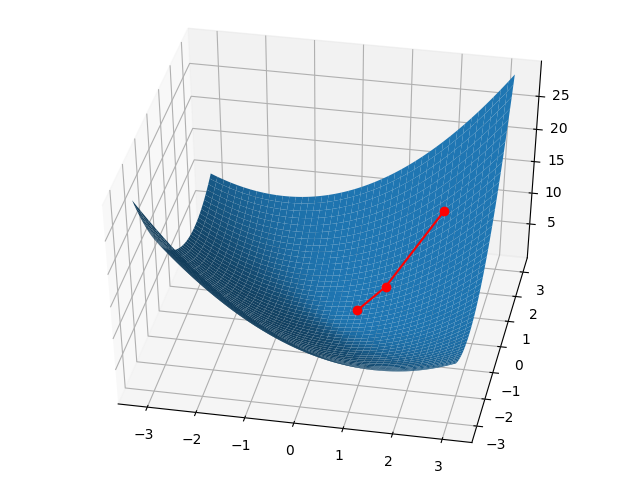

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return x**2+y**2+x*y

x = np.arange(-np.pi, np.pi, 0.02)
y = np.arange(-np.pi, np.pi, 0.02)
X, Y = np.meshgrid(x, y)
Z1 = f(X,Y)

x_p = [2, 1, 0.5]
y_p = [2, 1, 0.5]
z_p = [f(x_p[0], y_p[0]),f(x_p[1], y_p[1]),
      f(x_p[2], y_p[2])]
    
fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.plot(x_p, y_p, z_p, "o-", color="red")
plot3d.plot_surface(X,Y,Z1) 

plt.show()

損失関数の偏微分
$$
\begin{aligned}
\frac{\partial L}{\partial w_j} &= 
\sum_{i=1}^n \frac{\partial}{\partial w_j}(A_i \cdot w -b_i)^2 \\
&= \sum_{i=1}^n 2(A_i \cdot w -b_i) A_{ij}
\end{aligned}
$$
の最後の式の$A_{ij}$の係数ベクトルをdLwとして求めよ．その次元をshapeで確かめよ？

## 解答例

In [15]:
dLw = A.dot(w)-b
print(dLw.shape)

(300, 1)


# 問:wの更新

係数ベクトルdLwとAのdot積が勾配ベクトルとなる．
$$
w = w - \sigma(dLw^t \cdot A)^t
$$
として仮説ベクトル$w$を勾配に従って進めたベクトルを求めよ．
ここで$\sigma$はステップ幅と呼ばれ，勾配に従ってどの程度進むかを調整するパラメータで，大きすぎると最適値を通り越し，小さすぎると最適値にたどり着くまでに繰り返し(iteration)が多くなる．ここでは，`3.0*10**(-9)`程度とせよ．

## 解答例

In [16]:
loop, sigma = 300, 3.0*10**(-9)
print_w(w)
LL = np.dot(A, w) - b
print(np.dot(LL.transpose(),LL))
w = w - (dLw.transpose().dot(A)).transpose()*sigma
print_w(w)
LL = np.dot(A, w) - b
print(np.dot(LL.transpose(),LL))

    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.000100000  0.000100000  0.000100000
           texture:  0.000100000  0.000100000  0.000100000
         perimeter:  0.000100000  0.000100000  0.000100000
              area:  0.000100000  0.000100000  0.000100000
        smoothness:  0.000100000  0.000100000  0.000100000
       compactness:  0.000100000  0.000100000  0.000100000
         concavity:  0.000100000  0.000100000  0.000100000
    concave points:  0.000100000  0.000100000  0.000100000
          symmetry:  0.000100000  0.000100000  0.000100000
 fractal dimension:  0.000100000  0.000100000  0.000100000
[[ 354.73973502]]
    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.000095254  0.000095018  0.000067803
           texture: -0.000248336  0.000099981  0.000099951
         perimeter:  0.000099933  0.000099963  0.000099964
              area:  0.000099991  0.000099783  0.000099833
        smoothness:  0.000098420  0.00

# 問:最急降下の繰り返し
先ほどの漸近操作を300回程度繰り返し，その前後でwを表示してみよ．
最初の30データの予測値を比較せよ．

## 解答例

In [17]:
loop, sigma = 300, 3.0*10**(-9)
for i in range(loop):
    dLw = A.dot(w)-b
    w = w - (dLw.transpose().dot(A)).transpose()*sigma
    LL = np.dot(A, w) - b

print_w(w)
show_accuracy(A, b, w)
show_first_n_data(A, b, w, 30)

    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.000521147  0.000830565  0.002610776
           texture:  0.001656688  0.000104646  0.000100058
         perimeter:  0.000095983  0.000097902  0.000108838
              area:  0.000103554  0.000102348  0.000169429
        smoothness:  0.000099522 -0.000795121  0.000100425
       compactness:  0.000100420  0.000100697  0.000100259
         concavity:  0.000101184  0.000100187  0.000505184
    concave points:  0.001006849  0.002453114 -0.001933241
          symmetry:  0.000105845  0.000096075  0.000091685
 fractal dimension:  0.000097602  0.000111376  0.000103466
       correct:  274/ 300
    safe error:    5
critical error:   21
   0  predict:   -1.54364
M(-1)or B(1):   -1
   1  predict:   -0.84466
M(-1)or B(1):   -1
   2  predict:   -0.60572
M(-1)or B(1):   -1
   3  predict:    0.02368
M(-1)or B(1):   -1
   4  predict:   -0.19352
M(-1)or B(1):   -1
   5  predict:   -0.14373
M(-1)or B(1):   -1
   6  predict

# 問: QR分解

行列$A$のQR分解を行い，Q, R行列の次元をshapeで確かめよ．

## 解答例

In [18]:
q, r = np.linalg.qr(A)
print(q.shape)
print(r.shape)

(300, 30)
(30, 30)


# 問: 結果
仮説ベクトル$\boldsymbol{w}$の最適値
$$
ww =  R^{-1}.Q^t.b
$$
を求めよ．その値と精度を確かめよ．また距離の2乗
$$
||A.w -b ||^2
$$
が下がっていることを確かめよ．

In [19]:
ww =np.linalg.inv(r).dot(np.transpose(q).dot(b))
print(ww.shape)
print_w(ww)
show_accuracy(A, b, ww)

(30, 1)
    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.869921844 -0.024313948 -0.062679561
           texture: -0.003274619 -8.790300861  1.747147500
         perimeter: -0.202849407 -6.506451098  5.061760446
              area: 49.167541566 -0.956591421 -0.082052658
        smoothness: -0.007943157  0.004976908-27.841944367
       compactness:  3.301527110  4.985959134-16.318886295
         concavity: 10.316289081-21.332232171 -0.408605816
    concave points: -0.003345722 -0.000677873  0.002510735
          symmetry:  4.531369718  0.590110016 -0.719368704
 fractal dimension: -2.158965299 -3.803467225-12.298417038
       correct:  286/ 300
    safe error:    1
critical error:   13


In [20]:
LL = np.dot(A, ww) - b
print(np.dot(LL.transpose(),LL))

[[ 77.50051002]]


In [21]:
show_first_n_data(A, b, ww, 30)

   0  predict:   -0.96687
M(-1)or B(1):   -1
   1  predict:   -0.51795
M(-1)or B(1):   -1
   2  predict:   -1.35431
M(-1)or B(1):   -1
   3  predict:   -1.20772
M(-1)or B(1):   -1
   4  predict:   -0.67853
M(-1)or B(1):   -1
   5  predict:   -0.42976
M(-1)or B(1):   -1
   6  predict:   -0.80193
M(-1)or B(1):   -1
   7  predict:   -0.26553
M(-1)or B(1):   -1
   8  predict:   -0.58596
M(-1)or B(1):   -1
   9  predict:   -1.46669
M(-1)or B(1):   -1
  10  predict:   -0.28045
M(-1)or B(1):   -1
  11  predict:   -0.92474
M(-1)or B(1):   -1
  12  predict:   -0.44804
M(-1)or B(1):   -1
  13  predict:   -0.01676
M(-1)or B(1):   -1
  14  predict:   -0.33535
M(-1)or B(1):   -1
  15  predict:   -0.96765
M(-1)or B(1):   -1
  16  predict:   -0.80508
M(-1)or B(1):   -1
  17  predict:   -1.00873
M(-1)or B(1):   -1
  18  predict:   -1.24782
M(-1)or B(1):   -1
  19  predict:    0.25212
M(-1)or B(1):    1
  20  predict:    0.98083
M(-1)or B(1):    1
  21  predict:    1.27821
M(-1)or B(1):    1
  22  pred